In [64]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df= pd.read_csv("bank.csv")
df.head(5)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Purchased
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [66]:
df.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Purchased    0
dtype: int64

In [67]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [68]:
for col in ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome']:
    print(f"{col}: {df[col].unique()}")

Job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Marital: ['married' 'single' 'divorced']
Education: ['primary' 'secondary' 'tertiary' 'unknown']
Default: ['no' 'yes']
Housing: ['no' 'yes']
Loan: ['no' 'yes']
Contact: ['cellular' 'unknown' 'telephone']
Poutcome: ['unknown' 'failure' 'other' 'success']


In [69]:
# Encode the Variables
df['Purchased'] = df['Purchased'].map({'yes': 1, 'no': 0})
df['Housing'] = df['Housing'].map({'yes': 1, 'no': 0})
df['Loan'] = df['Loan'].map({'yes': 1, 'no': 0})
df['Default'] = df['Default'].map({'yes': 1, 'no': 0})
df

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Purchased
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [70]:
# Drop irrelevant columns
df = df.drop(columns=['Day', 'Month'])
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Duration,Campaign,Pdays,Previous,Poutcome,Purchased
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,226,1,-1,0,unknown,0


In [71]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Poutcome'], drop_first=True)
df

,Age,Balance,Duration,Campaign,Pdays,Previous,Purchased,Job_blue-collar,Job_entrepreneur,Job_housemaid,...,Education_tertiary,Education_unknown,Default_1,Housing_1,Loan_1,Contact_telephone,Contact_unknown,Poutcome_other,Poutcome_success,Poutcome_unknown
0,30,1787,79,1,-1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,33,4789,220,1,339,4,0,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,35,1350,185,1,330,1,0,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,30,1476,199,4,-1,0,0,False,False,False,...,True,False,False,True,True,False,True,False,False,True
4,59,0,226,1,-1,0,0,True,False,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4517,57,-3313,153,1,-1,0,0,False,False,False,...,True,False,True,True,True,False,True,False,False,True
4518,57,295,151,11,-1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4519,28,1137,129,4,211,3,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False


# Split Data into Train/Test Sets

In [72]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df.drop(columns=['Purchased'])
y = df['Purchased']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the Decision Tree Model

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Evaluate the Model

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
# Predict on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.51      0.24      0.33        98

    accuracy                           0.89       905
   macro avg       0.71      0.61      0.64       905
weighted avg       0.87      0.89      0.88       905

[[784  23]
 [ 74  24]]


# Visualize the Decision Tree

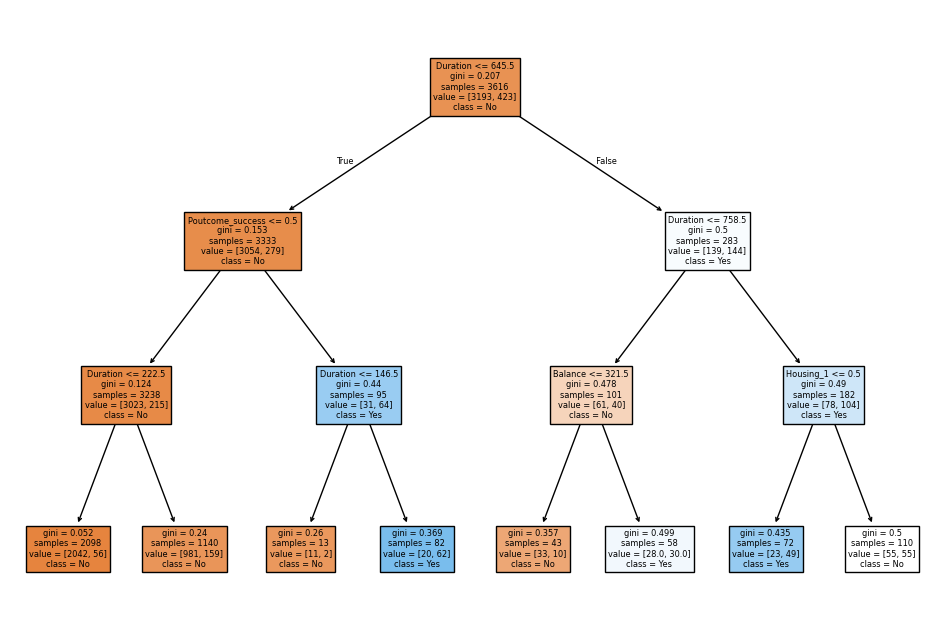

In [75]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()